### Tracing test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

In [2]:
Q = 100
npor = 0.3
k = 10
H = 10
T = k * H
Ss = 1e-4
S = Ss * H
ml = ModelMaq(kaq=[k], z=[H, 0], Saq=[Ss], tmin=1, tmax=100, M=10)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, Q)])
ml.solve()

self.neq  1
solution complete


In [3]:
ml.aq.c

array([1.e+100])

In [4]:
timtrace = timtraceline(ml, 50, 50, 0, tstart=1, delt=1, tmax=50, nstepmax=50)

reached maximum time tmax


\begin{equation}
Q_r = -T\frac{\partial h}{\partial r} = -T\frac{\text{d} h}{\text{d} u}\frac{\partial u}{\partial r} = -\frac{Q}{2\pi} \frac{1}{r}\exp(-u)
\end{equation}
\begin{equation}
u =  \frac{S r^2}{4T(t-t_0)}
\end{equation}

In [5]:
def vxytheis(t, xy):
    x, y = xy
    r = np.sqrt(x ** 2 + y ** 2)
    u = S * r ** 2 / (4 * T * t)
    Qr = -Q / (2 * np.pi) / r * np.exp(-u)
    vr = Qr / (H * npor)
    vx = vr * x / r
    vy = vr * y / r
    return np.array([vx, vy])

In [6]:
from scipy.integrate import solve_ivp
t = np.arange(1, 52)
path0 = solve_ivp(vxytheis, (1, 51), y0=[50, 50], t_eval=t)

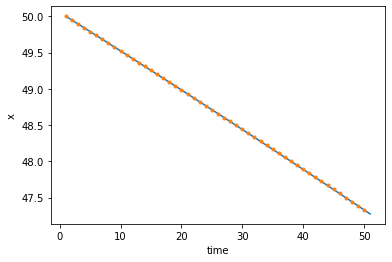

In [7]:
plt.plot(t, path0.y[0])
plt.plot(timtrace['trace'][:, 3], timtrace['trace'][:, 0], '.')
plt.xlabel('time')
plt.ylabel('x');

# Velocities in multi-layer system

In [8]:
Q = 100
npor = 0.3
k = 10
H = 10
Hstar = 2
c = 1000
T = k * H
Ss = 1e-4
S = Ss * H
ml = ModelMaq(kaq=[k, k], z=[2 * H + Hstar, H + Hstar, H, 0], c=[c], Saq=[Ss], tmin=1, tmax=100, M=10)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, Q)], layers=0)
ml.solve()

self.neq  1
solution complete


In [9]:
timtrace = timtraceline(ml, 20, 20, 4, tstart=1, delt=1, tmax=50, nstepmax=50)

reached maximum time tmax


In [10]:
timtrace

{'trace': array([[20.        , 20.        ,  4.        ,  1.        ],
        [19.99870023, 19.99870023,  4.00046088,  2.        ],
        [19.99733911, 19.99733911,  4.00092661,  3.        ],
        [19.99595617, 19.99595617,  4.00139277,  4.        ],
        [19.99456225, 19.99456225,  4.00185903,  5.        ],
        [19.99316177, 19.99316177,  4.00232537,  6.        ],
        [19.99175693, 19.99175693,  4.00279177,  7.        ],
        [19.990349  , 19.990349  ,  4.00325824,  8.        ],
        [19.98893876, 19.98893876,  4.00372478,  9.        ],
        [19.98752675, 19.98752675,  4.0041914 , 10.        ],
        [19.98611332, 19.98611332,  4.00465808, 11.        ],
        [19.98469872, 19.98469872,  4.00512482, 12.        ],
        [19.98328321, 19.98328321,  4.00559164, 13.        ],
        [19.9818669 , 19.9818669 ,  4.00605853, 14.        ],
        [19.98044992, 19.98044992,  4.00652548, 15.        ],
        [19.97903238, 19.97903238,  4.00699251, 16.        ],

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

In [12]:
Q = 100
npor = 0.3
k = 10
H = 10
Hstar = 2
c = 1000
T = k * H
Ss = 1e-4
S = Ss * H
ml = Model3D(kaq=10, z=[20, 15, 10, 5, 0], tmin=1, tmax=10000)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, Q)], layers=1, rw=0.1)
ml.solve()

self.neq  1
solution complete


In [13]:
timtrace = timtraceline(ml, 20, 20, 16, tstart=1, delt=5, tmax=200, nstepmax=40, hstepmax=2)
timtrace

reached element of type well


{'trace': array([[ 20.        ,  20.        ,  16.        ,   1.        ],
        [ 19.6471975 ,  19.6471975 ,  15.98576922,   6.        ],
        [ 19.28512126,  19.28512126,  15.9686726 ,  11.        ],
        [ 18.91748642,  18.91748642,  15.94968545,  16.        ],
        [ 18.54439278,  18.54439278,  15.92869748,  21.        ],
        [ 18.16576298,  18.16576298,  15.90552444,  26.        ],
        [ 17.78147641,  17.78147641,  15.87994323,  31.        ],
        [ 17.39139617,  17.39139617,  15.85169605,  36.        ],
        [ 16.99537768,  16.99537768,  15.82048769,  41.        ],
        [ 16.5932727 ,  16.5932727 ,  15.78598057,  46.        ],
        [ 16.18493174,  16.18493174,  15.7477881 ,  51.        ],
        [ 15.77020613,  15.77020613,  15.70546634,  56.        ],
        [ 15.3489501 ,  15.3489501 ,  15.65850378,  61.        ],
        [ 14.92102302,  14.92102302,  15.60630893,  66.        ],
        [ 14.48629203,  14.48629203,  15.5481949 ,  71.        ],
 

reached maximum number of steps
reached maximum number of steps
reached maximum number of steps
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well


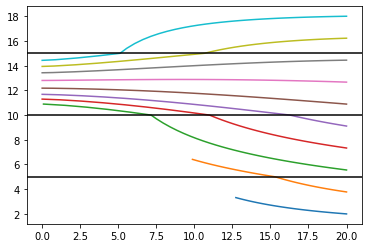

In [14]:
zstart = np.linspace(2, 18, 10)
for zs in zstart:
    timtrace = timtraceline(ml, 20, 20, zs, tstart=1, delt=5, tmax=200, nstepmax=40, hstepmax=2)
    xyzt = timtrace['trace']
    plt.plot(xyzt[:, 0], xyzt[:, 2])
for y in [5, 10, 15]:
    plt.axhline(y, color='k')

In [15]:
xyzt

array([[ 20.        ,  20.        ,  18.        ,   1.        ],
       [ 19.6471975 ,  19.6471975 ,  17.99288461,   6.        ],
       [ 19.28512126,  19.28512126,  17.9843363 ,  11.        ],
       [ 18.91748642,  18.91748642,  17.97484273,  16.        ],
       [ 18.54439278,  18.54439278,  17.96434874,  21.        ],
       [ 18.16576298,  18.16576298,  17.95276222,  26.        ],
       [ 17.78147641,  17.78147641,  17.93997161,  31.        ],
       [ 17.39139617,  17.39139617,  17.92584802,  36.        ],
       [ 16.99537768,  16.99537768,  17.91024384,  41.        ],
       [ 16.5932727 ,  16.5932727 ,  17.89299029,  46.        ],
       [ 16.18493174,  16.18493174,  17.87389405,  51.        ],
       [ 15.77020613,  15.77020613,  17.85273317,  56.        ],
       [ 15.3489501 ,  15.3489501 ,  17.82925189,  61.        ],
       [ 14.92102302,  14.92102302,  17.80315446,  66.        ],
       [ 14.48629203,  14.48629203,  17.77409745,  71.        ],
       [ 14.04463521,  14

In [16]:
Q = 100
npor = 0.3
k = 10
H = 10
Hstar = 2
c = 1000
T = k * H
Ss = 1e-4
S = Ss * H
ml = Model3D(kaq=10, z=[20, 15, 10, 5, 0], tmin=1, tmax=10000)
w = Well(ml, xw=0, yw=0, tsandQ=[(0, -Q)], layers=1, rw=0.1)
ml.solve()

self.neq  1
solution complete


reached maximum time tmax
reached maximum time tmax
reached maximum time tmax
reached maximum time tmax
reached maximum time tmax
reached maximum time tmax
reached maximum time tmax
reached maximum time tmax
reached maximum time tmax
reached maximum time tmax


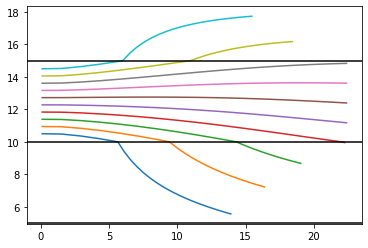

In [17]:
zstart = np.linspace(10.5, 14.5, 10)
for zs in zstart:
    timtrace = timtraceline(ml, 0.1, 0.1, zs, tstart=1, delt=5, tmax=100, nstepmax=40, hstepmax=2)
    xyzt = timtrace['trace']
    plt.plot(xyzt[:, 0], xyzt[:, 2])
for y in [5, 10, 15]:
    plt.axhline(y, color='k')

In [18]:
timtrace['trace']

array([[  0.1       ,   0.1       ,  14.5       ,   1.        ],
       [  1.51421356,   1.51421356,  14.51923542,   1.02666213],
       [  2.92842712,   2.92842712,  14.63200462,   1.44645823],
       [  4.34264069,   4.34264069,  14.78543236,   2.31540796],
       [  5.75685425,   5.75685425,  14.96531406,   3.71199741],
       [  6.003627  ,   6.003627  ,  15.        ,   4.06412958],
       [  6.53153357,   6.53153357,  15.47167501,   9.06412958],
       [  7.0619008 ,   7.0619008 ,  15.84953826,  14.06412958],
       [  7.59256819,   7.59256819,  16.15624751,  19.06412958],
       [  8.1218094 ,   8.1218094 ,  16.40819544,  24.06412958],
       [  8.64821071,   8.64821071,  16.61738315,  29.06412958],
       [  9.17062372,   9.17062372,  16.79273451,  34.06412958],
       [  9.68812851,   9.68812851,  16.94098442,  39.06412958],
       [ 10.20000057,  10.20000057,  17.06728618,  44.06412958],
       [ 10.70568103,  10.70568103,  17.17563312,  49.06412958],
       [ 11.20475029,  11